In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 한글폰트 사용 in colab
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# **데이터 로드**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/1-0. 서강대/1. 빅데이터 예측 분석 팀플 (6팀)/기말 팀 프로젝트/20221203_우균/20221203_데이터 세트(취합).csv")

In [ ]:
df = df.drop(['차주일련번호','차주구분코드','생년','성별','내국인여부'], axis=1)
dfX = df.drop(['연체정보'], axis=1)
dfy = pd.DataFrame(df, columns=["연체정보"]) # 종속 변수로 DLQ 설정
print(dfX.shape, dfy.shape)

(2781, 17) (2781, 1)


In [ ]:
dfX.tail()

,최근 3개월 연체 건수,최근 6개월 연체 여부,공공정보 등록 건수,최근 3개월 공공정보 여부,최근 6개월 공공정보 여부,카드개설건수,신용판매한도금액,현금서비스한도금액,신용판매이용금액,현금서비스이용금액,최근3개월 신용판매 이용금액,최근3개월 현금서비스 이용금액,최근6개월 신용판매 이용금액,최근6개월 현금서비스 이용금액,보증금액,대출금액,대출금액_대부업권
2776,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2777,0,0,0,0,0,5,150000,110000,2550,0,507,0,715,0,0,22400,0
2778,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2779,0,0,0,0,0,2,15400,4600,600,0,237,0,533,0,0,13400,0
2780,0,0,0,0,0,2,36000,14600,1840,0,963,0,1047,0,0,0,0


In [ ]:
df.tail()

,연체정보,최근 3개월 연체 건수,최근 6개월 연체 여부,공공정보 등록 건수,최근 3개월 공공정보 여부,최근 6개월 공공정보 여부,카드개설건수,신용판매한도금액,현금서비스한도금액,신용판매이용금액,현금서비스이용금액,최근3개월 신용판매 이용금액,최근3개월 현금서비스 이용금액,최근6개월 신용판매 이용금액,최근6개월 현금서비스 이용금액,보증금액,대출금액,대출금액_대부업권
2776,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2777,0,0,0,0,0,0,5,150000,110000,2550,0,507,0,715,0,0,22400,0
2778,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2779,0,0,0,0,0,0,2,15400,4600,600,0,237,0,533,0,0,13400,0
2780,0,0,0,0,0,0,2,36000,14600,1840,0,963,0,1047,0,0,0,0


# **EDA**

## **결측치, 기초 통계량 확인**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   연체정보              2781 non-null   int64
 1   최근 3개월 연체 건수      2781 non-null   int64
 2   최근 6개월 연체 여부      2781 non-null   int64
 3   공공정보 등록 건수        2781 non-null   int64
 4   최근 3개월 공공정보 여부    2781 non-null   int64
 5   최근 6개월 공공정보 여부    2781 non-null   int64
 6   카드개설건수            2781 non-null   int64
 7   신용판매한도금액          2781 non-null   int64
 8   현금서비스한도금액         2781 non-null   int64
 9   신용판매이용금액          2781 non-null   int64
 10  현금서비스이용금액         2781 non-null   int64
 11  최근3개월 신용판매 이용금액   2781 non-null   int64
 12  최근3개월 현금서비스 이용금액  2781 non-null   int64
 13  최근6개월 신용판매 이용금액   2781 non-null   int64
 14  최근6개월 현금서비스 이용금액  2781 non-null   int64
 15  보증금액              2781 non-null   int64
 16  대출금액              2781 non-null   int64
 17  대출금액_대부업권         2781 non-null  

In [ ]:
# 기초 통계량 확인 (미사용. 우균님 추가 예정)
df.describe()

,연체정보,최근 3개월 연체 건수,최근 6개월 연체 여부,공공정보 등록 건수,최근 3개월 공공정보 여부,최근 6개월 공공정보 여부,카드개설건수,신용판매한도금액,현금서비스한도금액,신용판매이용금액,현금서비스이용금액,최근3개월 신용판매 이용금액,최근3개월 현금서비스 이용금액,최근6개월 신용판매 이용금액,최근6개월 현금서비스 이용금액,보증금액,대출금액,대출금액_대부업권
count,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2.781000e+03,2.781000e+03,2781.000000
mean,0.018698,0.136641,0.274362,0.032722,0.097447,0.197411,2.018698,28342.466739,10450.701187,858.090615,61.121899,296.947141,20.498741,308.348436,21.027328,5.495505e+03,3.168080e+04,103.728875
std,0.135482,1.134177,2.251272,0.221199,0.654973,1.312998,1.376972,39726.092918,18106.255240,1677.470342,540.651186,486.060546,175.485054,475.696417,176.347488,1.772160e+05,8.290917e+04,1046.853977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,10800.000000,2800.000000,200.000000,0.000000,113.000000,0.000000,140.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,42000.000000,13200.000000,1100.000000,0.000000,422.000000,0.000000,443.000000,0.000000,0.000000e+00,2.211000e+04,0.000000
max,1.000000,24.000000,48.000000,3.000000,9.000000,18.000000,6.000000,180000.000000,180000.000000,26890.000000,11800.000000,5250.000000,3500.000000,5250.000000,3500.000000,9.220000e+06,1.554000e+06,25600.000000


## **종속 변수 분포**

In [ ]:
dfy.value_counts()

연체정보
0       2729
1         52
dtype: int64

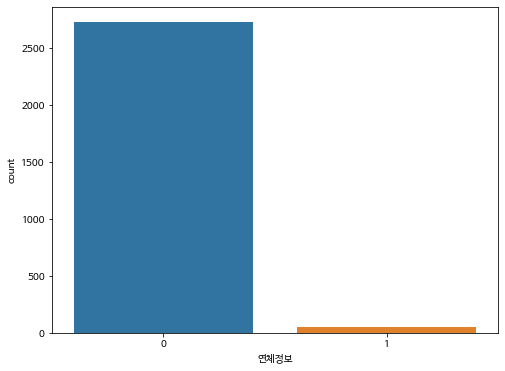

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='연체정보', data=dfy)
plt.show()

## **Feature Selection (변수별 영향력 도출)**

### **1. 상관 관계 분석(Filter Method)**

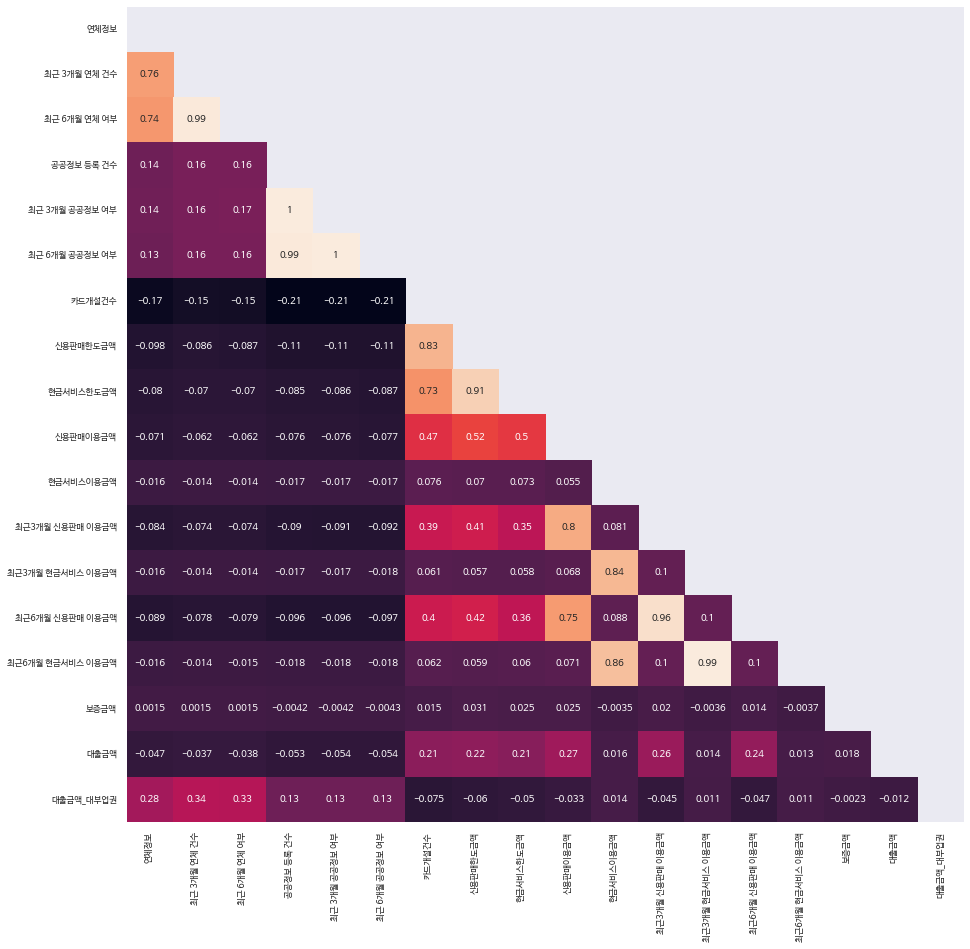

In [ ]:
#상관 관계 행렬
df_corr=df.corr()

plt.figure(figsize=(15,15))
sns.set(font_scale=0.8, font="NanumBarunGothic")

#mask
mask=np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_corr, annot=True, cbar=False, mask=mask)
plt.show()

### **2. Information Value (Filter Method)**

In [ ]:
!pip install xverse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xverse.transformer import WOE

clf = WOE()
y = dfy.T.squeeze()
clf.fit(dfX, y)

display(clf.woe_df.head()) #Weight of Evidence transformation dataset
display(clf.iv_df) #Information value dataset

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,최근 3개월 연체 건수,"(-0.001, 1.0]",2721,2,2719,0.000735,0.999265,0.038462,0.996336,-3.254425,8.452578
1,최근 3개월 연체 건수,"(1.0, 24.0]",60,50,10,0.833333,0.166667,0.961538,0.003664,5.569885,8.452578
2,최근 6개월 연체 여부,"(-0.001, 1.0]",2714,1,2713,0.000368,0.999632,0.019231,0.994137,-3.945364,8.837571
3,최근 6개월 연체 여부,"(1.0, 48.0]",67,51,16,0.761194,0.238806,0.980769,0.005863,5.119684,8.837571
4,공공정보 등록 건수,0,2709,45,2664,0.016611,0.983389,0.865385,0.976182,-0.120475,0.350987


,Variable_Name,Information_Value
9,최근 6개월 연체 여부,8.837571
7,최근 3개월 연체 건수,8.452578
2,대출금액_대부업권,1.372935
14,카드개설건수,0.879372
1,대출금액,0.592797
6,최근 3개월 공공정보 여부,0.357146
0,공공정보 등록 건수,0.350987
8,최근 6개월 공공정보 여부,0.200470
10,최근3개월 신용판매 이용금액,0.140982
4,신용판매이용금액,0.140642


## **PCA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df)

df_minmax = pd.DataFrame(df_minmax, columns = df.columns)
df_minmax.head()

,연체정보,최근 3개월 연체 건수,최근 6개월 연체 여부,공공정보 등록 건수,최근 3개월 공공정보 여부,최근 6개월 공공정보 여부,카드개설건수,신용판매한도금액,현금서비스한도금액,신용판매이용금액,현금서비스이용금액,최근3개월 신용판매 이용금액,최근3개월 현금서비스 이용금액,최근6개월 신용판매 이용금액,최근6개월 현금서비스 이용금액,보증금액,대출금액,대출금액_대부업권
0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.002445,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.105000,0.041667,0.030123,0.0,0.085714,0.0,0.077333,0.0,0.0,0.001544,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.177778,0.068889,0.042395,0.0,0.071810,0.0,0.109905,0.0,0.0,0.028958,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.488889,0.168889,0.052808,0.0,0.062476,0.0,0.064000,0.0,0.0,0.000000,0.0


In [ ]:
df_minmax = df_minmax.drop(['연체정보'], axis=1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca.fit(df_minmax)
 
df_pca = pca.transform(df_minmax)
df_pca = pd.DataFrame(df_pca, columns = ['PC1','PC2','PC3','PC4','PC5'])

df_pca

,PC1,PC2,PC3,PC4,PC5
0,-0.250182,-0.033223,-0.032208,0.022058,-0.001677
1,0.189340,-0.094822,-0.037072,-0.255623,-0.018322
2,-0.250282,-0.033213,-0.032409,0.022050,-0.001611
3,0.026260,-0.012671,0.043367,0.019532,-0.013480
4,0.470090,0.019075,-0.097189,-0.000024,-0.010648
...,...,...,...,...,...
2776,-0.250282,-0.033213,-0.032409,0.022050,-0.001611
2777,0.944238,0.132362,-0.105886,0.217430,-0.007972
2778,-0.250282,-0.033213,-0.032409,0.022050,-0.001611
2779,-0.053233,-0.041141,0.023621,-0.043873,-0.011923


In [ ]:
# pc의 설명력 정도
print(pca.explained_variance_ratio_) # pc1이 58프로의 설명력을 가짐

[0.641229   0.09996934 0.08892283 0.0559648  0.04005194]


**explained_variance_ratio는 해당 주성분들이 데이터를 얼마나 잘 설명하고 있는지 설명 비율.<br>
차원을 5개로 줄여도 92%가 넘는 분산 유지하고 있기 때문에 5개로 결정.**

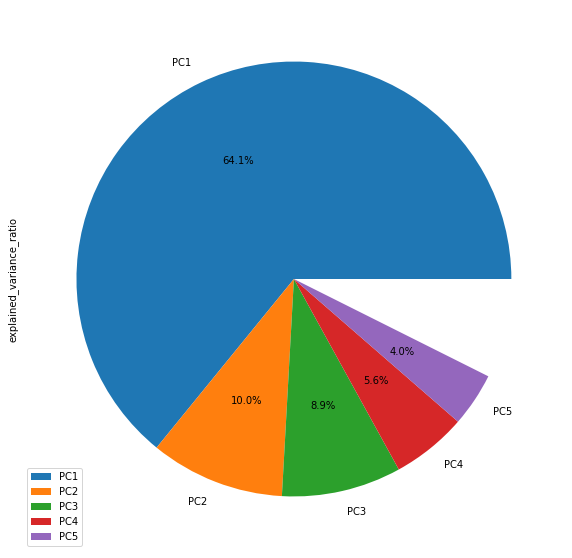

In [ ]:
df_v = pd.DataFrame(pca.explained_variance_ratio_, index=['PC1','PC2','PC3','PC4','PC5'], columns=['explained_variance_ratio'])
df_v['explained_variance_ratio'].plot(kind='pie', figsize=(20,10), autopct = '%1.1f%%', legend = True)

## **Feature Selection 3. 변수 중요도(DT)**

### **train, test 분리 (8:2)**

In [ ]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(dfX , dfy , test_size=0.2, shuffle=False)  # random_state=156
print(X_train.shape, X_test.shape)

(2224, 17) (557, 17)


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1, max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

### **feature_importances**

최근 3개월 연체 건수        0.890594
대출금액_대부업권           0.060636
최근 6개월 연체 여부        0.023899
카드개설건수              0.015943
대출금액                0.008928
공공정보 등록 건수          0.000000
최근 3개월 공공정보 여부      0.000000
최근 6개월 공공정보 여부      0.000000
신용판매한도금액            0.000000
현금서비스한도금액           0.000000
현금서비스이용금액           0.000000
최근3개월 신용판매 이용금액     0.000000
최근3개월 현금서비스 이용금액    0.000000
최근6개월 신용판매 이용금액     0.000000
최근6개월 현금서비스 이용금액    0.000000
보증금액                0.000000
신용판매이용금액            0.000000
dtype: float64


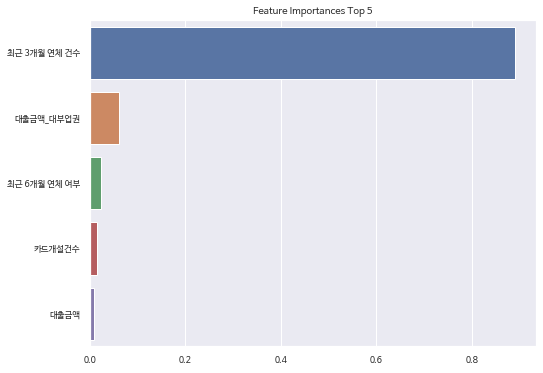

In [ ]:
# Feature Importance
feature_importance_values = dt.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=dfX.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False)[:5] # 10개 혹은 20개 등 개수를 바꾸고 싶다면 이 부분을 변경
feature_top = feature_importances.sort_values(ascending=False)[:]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

print(feature_top)